In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression

## Cleaning Data

In [2]:
rapm = pd.read_csv('3yrapm.csv')

In [3]:
rapm.head()

,FourFactorsRAPM,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,playerId,playerName,LA_RAPM,LA_RAPM_Rank,LA_RAPM__Def,LA_RAPM__Def_Rank,LA_RAPM__Off,LA_RAPM__Off_Rank,RA_EFG,RA_EFG_Rank,RA_EFG__Def,RA_EFG__Def_Rank,RA_EFG__Off,RA_EFG__Off_Rank,RA_FTR,RA_FTR_Rank,RA_FTR__Def,RA_FTR__Def_Rank,RA_FTR__Off,RA_FTR__Off_Rank,RA_ORBD,RA_ORBD_Rank,RA_ORBD__Def,RA_ORBD__Def_Rank,RA_ORBD__Off,RA_ORBD__Off_Rank,RA_TOV,RA_TOV_Rank,RA_TOV__Def,RA_TOV__Def_Rank,RA_TOV__Off,RA_TOV__Off_Rank,RAPM,RAPM_Rank,RAPM__Def,RAPM__Def_Rank,RAPM__Off,RAPM__Off_Rank,season,teamId,teamName,primaryKey,playerRole
2,1627783,Pascal Siakam,2.91,25,1.35,47,1.56,45,2.24,16,1.21,18,1.04,42,-0.86,513,-0.31,453,-0.55,498,0.91,162,0.42,210,0.49,203,0.64,102,0.06,312,0.58,57,4.72,12,2.45,14,2.26,34,2018-21,-1,NaN,1627783_2018-21,No Role Available
3,1627745,Damian Jones,-2.05,727,-1.32,721,-0.73,618,-1.08,699,-1.17,748,0.09,258,-2.41,686,0.42,255,-2.83,733,-1.3,635,-0.54,569,-0.76,596,-0.46,605,0.22,194,-0.68,713,-2.88,734,-1.8,727,-1.08,645,2018-21,-1,NaN,1627745_2018-21,No Role Available
4,101108,Chris Paul,4.33,8,1.8,26,2.52,20,1.64,30,0.28,175,1.36,24,0.21,322,2.39,53,-2.18,702,-0.97,584,-0.14,444,-0.83,609,2.23,1,1.13,10,1.1,6,5.43,7,2.28,19,3.15,18,2018-21,-1,NaN,101108_2018-21,No Role Available


In [4]:
rapm.columns = rapm.iloc[1]
rapm = rapm.drop([0,1])
rapm = rapm.reset_index(drop = True)
rapm.head()

1,playerId,playerName,LA_RAPM,LA_RAPM_Rank,LA_RAPM__Def,LA_RAPM__Def_Rank,LA_RAPM__Off,LA_RAPM__Off_Rank,RA_EFG,RA_EFG_Rank,RA_EFG__Def,RA_EFG__Def_Rank,RA_EFG__Off,RA_EFG__Off_Rank,RA_FTR,RA_FTR_Rank,RA_FTR__Def,RA_FTR__Def_Rank,RA_FTR__Off,RA_FTR__Off_Rank,RA_ORBD,RA_ORBD_Rank,RA_ORBD__Def,RA_ORBD__Def_Rank,RA_ORBD__Off,RA_ORBD__Off_Rank,RA_TOV,RA_TOV_Rank,RA_TOV__Def,RA_TOV__Def_Rank,RA_TOV__Off,RA_TOV__Off_Rank,RAPM,RAPM_Rank,RAPM__Def,RAPM__Def_Rank,RAPM__Off,RAPM__Off_Rank,season,teamId,teamName,primaryKey,playerRole
0,1627783,Pascal Siakam,2.91,25,1.35,47,1.56,45,2.24,16,1.21,18,1.04,42,-0.86,513,-0.31,453,-0.55,498,0.91,162,0.42,210,0.49,203,0.64,102,0.06,312,0.58,57,4.72,12,2.45,14,2.26,34,2018-21,-1,NaN,1627783_2018-21,No Role Available
1,1627745,Damian Jones,-2.05,727,-1.32,721,-0.73,618,-1.08,699,-1.17,748,0.09,258,-2.41,686,0.42,255,-2.83,733,-1.3,635,-0.54,569,-0.76,596,-0.46,605,0.22,194,-0.68,713,-2.88,734,-1.8,727,-1.08,645,2018-21,-1,NaN,1627745_2018-21,No Role Available
2,101108,Chris Paul,4.33,8,1.8,26,2.52,20,1.64,30,0.28,175,1.36,24,0.21,322,2.39,53,-2.18,702,-0.97,584,-0.14,444,-0.83,609,2.23,1,1.13,10,1.1,6,5.43,7,2.28,19,3.15,18,2018-21,-1,NaN,101108_2018-21,No Role Available
3,1629745,Tariq Owens,-0.28,439,-0.2,475,-0.08,387,-0.12,413,-0.09,443,-0.03,350,0.15,333,0.26,290,-0.12,388,-0.46,468,-0.32,512,-0.14,418,0.08,334,0.03,338,0.05,324,-0.28,440,-0.16,445,-0.12,394,2018-21,-1,NaN,1629745_2018-21,No Role Available
4,1626245,Cristiano Felicio,-0.93,606,-1.18,711,0.25,234,-1.16,710,-1.17,747,0.01,315,2.89,62,2.37,54,0.51,240,2.52,44,-0.37,529,2.89,14,-0.79,677,-0.19,524,-0.6,695,-1.53,655,-1.83,731,0.3,226,2018-21,-1,NaN,1626245_2018-21,No Role Available


In [5]:
rapm = rapm.rename(columns={'playerName':'Player'})

In [6]:
rapm.head()
rapm.sort_values(by='LA_RAPM', ascending=False).head(50)

1,playerId,Player,LA_RAPM,LA_RAPM_Rank,LA_RAPM__Def,LA_RAPM__Def_Rank,LA_RAPM__Off,LA_RAPM__Off_Rank,RA_EFG,RA_EFG_Rank,RA_EFG__Def,RA_EFG__Def_Rank,RA_EFG__Off,RA_EFG__Off_Rank,RA_FTR,RA_FTR_Rank,RA_FTR__Def,RA_FTR__Def_Rank,RA_FTR__Off,RA_FTR__Off_Rank,RA_ORBD,RA_ORBD_Rank,RA_ORBD__Def,RA_ORBD__Def_Rank,RA_ORBD__Off,RA_ORBD__Off_Rank,RA_TOV,RA_TOV_Rank,RA_TOV__Def,RA_TOV__Def_Rank,RA_TOV__Off,RA_TOV__Off_Rank,RAPM,RAPM_Rank,RAPM__Def,RAPM__Def_Rank,RAPM__Off,RAPM__Off_Rank,season,teamId,teamName,primaryKey,playerRole
733,203507,Giannis Antetokounmpo,6.71,1,3.8,1,2.91,13,3.28,2,1.59,5,1.69,17,6.09,8,1.52,104,4.57,7,0.98,153,1.88,16,-0.9,624,0.47,139,0.37,133,0.1,298,6.41,3,4.07,2,2.34,30,2018-21,-1,NaN,203507_2018-21,No Role Available
650,201939,Stephen Curry,5.35,2,1.07,69,4.28,3,3.04,3,0.37,138,2.66,2,-0.8,500,-1.13,607,0.32,273,0.55,220,0.06,353,0.48,205,0.24,238,0.31,158,-0.07,462,5.71,6,1,97,4.7,4,2018-21,-1,NaN,201939_2018-21,No Role Available
233,2544,LeBron James,5.33,3,2.1,15,3.23,8,2.71,5,0.84,49,1.87,6,3.1,52,2.53,48,0.57,228,0.84,173,1.29,53,-0.45,518,0.82,64,0.54,82,0.29,158,6.02,4,2.86,10,3.16,17,2018-21,-1,NaN,2544_2018-21,No Role Available
693,202695,Kawhi Leonard,4.86,4,1.26,54,3.6,6,2.35,13,0.53,93,1.81,10,1.99,102,1.63,92,0.36,266,2.04,63,1.66,23,0.38,227,1.03,39,0.09,280,0.94,13,5.8,5,1.42,56,4.38,6,2018-21,-1,NaN,202695_2018-21,No Role Available
671,202331,Paul George,4.81,5,2.24,11,2.57,19,2.46,8,0.99,30,1.47,19,-0.45,464,0.17,317,-0.62,516,0.44,235,0.22,283,0.23,268,1.37,18,0.93,30,0.44,93,6.99,1,3.35,5,3.64,11,2018-21,-1,NaN,202331_2018-21,No Role Available
357,1628369,Jayson Tatum,4.68,6,2.07,18,2.62,17,1.8,23,0.92,41,0.88,61,0.94,209,0.44,246,0.5,243,0.82,175,0.21,284,0.61,171,1.32,23,0.33,148,0.99,10,4.97,10,1.79,33,3.18,16,2018-21,-1,NaN,1628369_2018-21,No Role Available
699,203497,Rudy Gobert,4.57,7,3.53,2,1.04,79,2.66,6,1.85,2,0.81,66,6.78,4,5.4,3,1.37,117,2.46,49,1.8,18,0.66,152,-0.91,697,-0.41,635,-0.5,668,5.28,8,4.13,1,1.14,103,2018-21,-1,NaN,203497_2018-21,No Role Available
2,101108,Chris Paul,4.33,8,1.8,26,2.52,20,1.64,30,0.28,175,1.36,24,0.21,322,2.39,53,-2.18,702,-0.97,584,-0.14,444,-0.83,609,2.23,1,1.13,10,1.1,6,5.43,7,2.28,19,3.15,18,2018-21,-1,NaN,101108_2018-21,No Role Available
97,201588,George Hill,4.22,9,1.94,21,2.28,23,1.94,20,0.99,33,0.96,47,2.99,56,0.12,336,2.87,32,0.75,191,0.01,380,0.76,131,0.72,87,0.19,218,0.53,70,4.05,18,1.81,31,2.24,36,2018-21,-1,NaN,201588_2018-21,No Role Available
204,203999,Nikola Jokic,4.21,10,0.73,108,3.49,7,1.03,77,-0.43,624,1.46,20,2.95,59,2.99,30,-0.04,360,2.7,32,1.36,45,1.34,66,-0.4,579,-0.35,607,-0.05,443,3.09,33,0.21,256,2.88,22,2018-21,-1,NaN,203999_2018-21,No Role Available


In [7]:
stats19 = pd.read_csv('2019stats.csv')
stats20 = pd.read_csv('2020stats.csv')
stats21 = pd.read_csv('2021stats.csv')

In [8]:
names = stats19['Player']
names_clean = []
for player in names:
    names_clean.append(player.split('\\')[0])

stats19['Player'] = names_clean

In [9]:
stats19.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Alex Abrines,SG,25,OKC,31,2,588,56,157,0.357,41,127,0.323,15,30,0.500,0.487,12,13,0.923,5,43,48,20,17,6,14,53,165
1,2,Quincy Acy,PF,28,PHO,10,0,123,4,18,0.222,2,15,0.133,2,3,0.667,0.278,7,10,0.700,3,22,25,8,1,4,4,24,17
2,3,Jaylen Adams,PG,22,ATL,34,1,428,38,110,0.345,25,74,0.338,13,36,0.361,0.459,7,9,0.778,11,49,60,65,14,5,28,45,108
3,4,Steven Adams,C,25,OKC,80,80,2669,481,809,0.595,0,2,0.000,481,807,0.596,0.595,146,292,0.500,391,369,760,124,117,76,135,204,1108
4,5,Bam Adebayo,C,21,MIA,82,28,1913,280,486,0.576,3,15,0.200,277,471,0.588,0.579,166,226,0.735,165,432,597,184,71,65,121,203,729


In [10]:
names = stats20['Player']
names_clean = []
for player in names:
    names_clean.append(player.split('\\')[0])

stats20['Player'] = names_clean

In [11]:
stats20.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,1680,283,478,0.592,1,3,0.333,282,475,0.594,0.593,117,201,0.582,207,376,583,146,51,67,94,122,684
1,2,Bam Adebayo,PF,22,MIA,72,72,2417,440,790,0.557,2,14,0.143,438,776,0.564,0.558,264,382,0.691,176,559,735,368,82,93,204,182,1146
2,3,LaMarcus Aldridge,C,34,SAS,53,53,1754,391,793,0.493,61,157,0.389,330,636,0.519,0.532,158,191,0.827,103,289,392,129,36,87,74,128,1001
3,4,Kyle Alexander,C,23,MIA,2,0,13,1,2,0.500,0,0,NaN,1,2,0.500,0.500,0,0,NaN,2,1,3,0,0,0,1,1,2
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,591,98,266,0.368,46,133,0.346,52,133,0.391,0.455,25,37,0.676,9,75,84,89,17,8,54,57,267


In [12]:
names = stats21['Player']
names_clean = []
for player in names:
    names_clean.append(player.split('\\')[0])

stats21['Player'] = names_clean

In [13]:
stats21.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,PF,21,MIA,61,4,737,124,228,0.544,0,1,0.000,124,227,0.546,0.544,56,110,0.509,73,135,208,29,20,28,43,91,304
1,2,Jaylen Adams,PG,24,MIL,7,0,18,1,8,0.125,0,2,0.000,1,6,0.167,0.125,0,0,NaN,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,C,27,NOP,58,58,1605,189,308,0.614,0,3,0.000,189,305,0.620,0.614,60,135,0.444,213,301,514,111,54,38,78,113,438
3,4,Bam Adebayo,C,23,MIA,64,64,2143,456,800,0.570,2,8,0.250,454,792,0.573,0.571,283,354,0.799,142,431,573,346,75,66,169,145,1197
4,5,LaMarcus Aldridge,C,35,TOT,26,23,674,140,296,0.473,31,80,0.388,109,216,0.505,0.525,41,47,0.872,19,99,118,49,11,29,27,47,352


In [14]:
stats19 = stats19.drop_duplicates(subset = ['Player'], keep='first')
stats20 = stats20.drop_duplicates(subset = ['Player'], keep='first')
stats21 = stats21.drop_duplicates(subset = ['Player'], keep='first')

In [15]:
temp = stats19.append(stats20)

In [16]:
stats_3y = temp.append(stats21)

In [17]:
stats_3y.shape

(1600, 30)

In [18]:
clean = stats_3y.groupby('Player')['G'].sum()
clean = clean.reset_index()
clean.head()

,Player,G
0,Aaron Gordon,190
1,Aaron Holiday,182
2,Aaron Nesmith,46
3,Abdel Nader,140
4,Adam Mokoka,25


In [19]:
points = stats_3y.groupby('Player')['PTS'].sum()
assists = stats_3y.groupby('Player')['AST'].sum()
rebounds = stats_3y.groupby('Player')['TRB'].sum()
fieldgoals = stats_3y.groupby('Player')['FG'].sum()
fieldgoalsa = stats_3y.groupby('Player')['FGA'].sum()
steals = stats_3y.groupby('Player')['STL'].sum()
blocks = stats_3y.groupby('Player')['BLK'].sum()
turnovers = stats_3y.groupby('Player')['TOV'].sum()
minutes = stats_3y.groupby('Player')['MP'].sum()

In [20]:
data = clean.merge(points, on='Player')
data2 = data.merge(assists, on='Player')
data3 = data2.merge(rebounds, on='Player')
data4 = data3.merge(fieldgoals, on='Player')
data5 = data4.merge(fieldgoalsa, on='Player')
data6 = data5.merge(steals, on='Player')
data7 = data6.merge(blocks, on='Player')
data8 = data7.merge(turnovers, on='Player')
data9 = data8.merge(minutes, on='Player')
clean_data = data9.merge(rapm, on = 'Player')


In [21]:
qual_3y = clean_data.loc[clean_data['G'] > 118]
qual_3y.sort_values(by = 'LA_RAPM', ascending = False)
qual_3y_mpg = qual_3y.loc[qual_3y['MP']/qual_3y['G'] > 15]


## Calculating 'stat' value

In [22]:
playersdf_avg = pd.DataFrame(qual_3y_mpg['Player'])
stats_avg = []
for player in qual_3y.iterrows():
    new = ((2 * qual_3y_mpg['FG']) - (1 * qual_3y_mpg['FGA']) + (qual_3y_mpg['TRB']) + (2 * qual_3y_mpg['AST']) + (2 * qual_3y_mpg['STL']) + (2 * qual_3y_mpg['BLK']) - (2 * qual_3y_mpg['TOV']) + (qual_3y_mpg['PTS'])) / qual_3y_mpg['G']
    stats_avg.append(new)
playersdf_avg = pd.DataFrame({'Player':qual_3y_mpg['Player'], 'stat':stats_avg[0], 'RAPM':qual_3y_mpg['RAPM']})
playersdf_avg['RAPM'] = playersdf_avg['RAPM'].astype(float)
playersdf_avg.sort_values(by='RAPM', ascending = False).tail()


,Player,stat,RAPM
226,Glenn Robinson III,12.704545,-3.09
490,Mo Bamba,14.509677,-3.15
87,Cedi Osman,18.220000,-3.19
30,Anfernee Simons,10.227273,-3.56
106,Collin Sexton,25.536232,-3.59


## Initial Plot

C:\Users\Matt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(41, 6.4, 'Giannis Antetekounmpo')

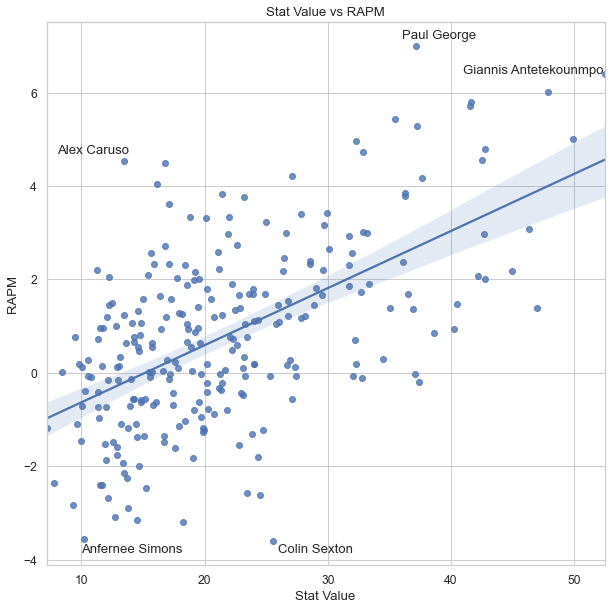

In [23]:
plt.figure(figsize=(10,10))
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.regplot(playersdf_avg['stat'], playersdf_avg['RAPM'])
plt.xlabel('Stat Value')
plt.title('Stat Value vs RAPM')
plt.annotate('Paul George', (36, 7.15))
plt.annotate('Anfernee Simons', (10, -3.85))
plt.annotate('Colin Sexton', (26, -3.85))
plt.annotate('Alex Caruso', (8, 4.7))
plt.annotate('Giannis Antetekounmpo', (41, 6.4))

## Regression

In [24]:
x1 = np.array(playersdf_avg['stat']).reshape((257,1))
y1 = np.array(playersdf_avg['RAPM'])


In [25]:
reg = LinearRegression()
reg.fit(x1,y1)
reg.score(x1,y1)

0.32901607528339594

In [26]:
y_predict1 = reg.predict(x1)

In [27]:
playersdf_avg['Predicted_RAPM'] = y_predict1
residuals_avg =[]
for player in playersdf_avg:
    resid = playersdf_avg['RAPM'] - playersdf_avg['Predicted_RAPM']
    residuals_avg.append(resid)

playersdf_avg["Residuals"] = residuals_avg[0]
bottom15 = playersdf_avg.sort_values(by='Residuals', ascending=False).tail(15)
top15 = playersdf_avg.sort_values(by='Residuals', ascending=False).head(15)
top15.to_csv('top15.csv', index=False)
bottom15.to_csv('bottom15.csv', index=False)
playersdf_avg

,Player,stat,RAPM,Predicted_RAPM,Residuals
0,Aaron Gordon,26.468421,2.47,1.383713,1.086287
1,Aaron Holiday,12.489011,1.50,-0.326928,1.826928
6,Al Horford,28.570552,2.34,1.640948,0.699052
7,Al-Farouq Aminu,16.368852,1.64,0.147843,1.492157
9,Alec Burks,19.167598,-0.79,0.490322,-1.280322
...,...,...,...,...,...
678,Wendell Carter Jr.,22.773050,-1.55,0.931516,-2.481516
681,Wesley Matthews,12.257732,1.46,-0.355229,1.815229
682,Will Barton,22.656051,0.59,0.917199,-0.327199
685,Willie Cauley-Stein,21.154255,2.22,0.733426,1.486574


## Additional Visuals

Text(0.5, 1.0, 'Distribution of Residuals')

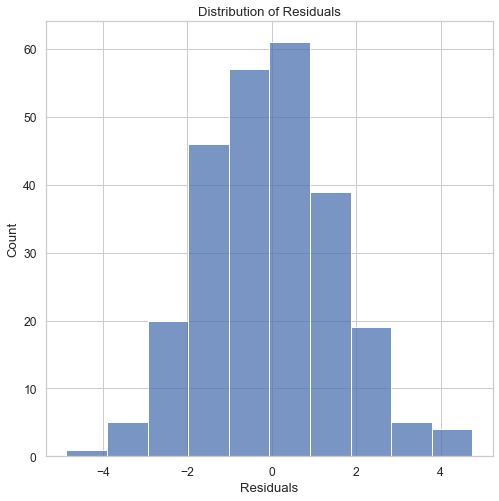

In [28]:
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
sns.histplot(data=playersdf_avg, x = 'Residuals', bins =10)
plt.title('Distribution of Residuals')

C:\Users\Matt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Statistical Value')

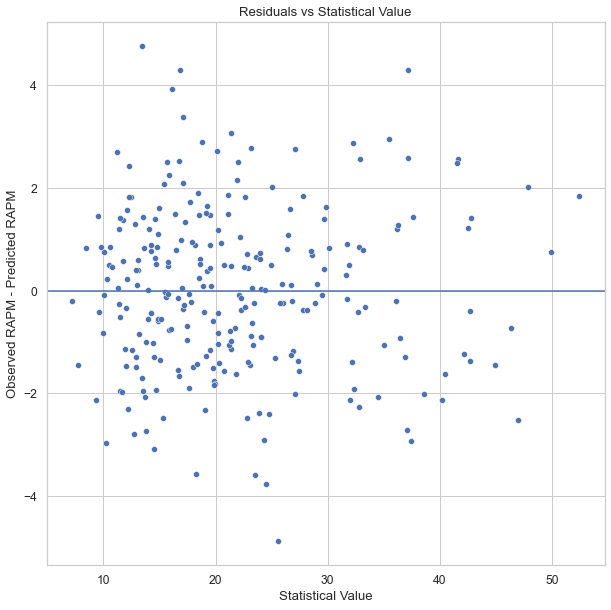

In [29]:
sns.set(font_scale=1.1)
sns.set_style('whitegrid')
plt.figure(figsize= (10,10))
sns.scatterplot(playersdf_avg['stat'], playersdf_avg['Residuals'])
plt.axhline(0)
plt.title('Residuals vs Statistical Value')
plt.ylabel('Observed RAPM - Predicted RAPM')
plt.xlabel('Statistical Value')

In [30]:
qual_3y_mpg['Residuals'] = playersdf_avg['Residuals']
top15stats = qual_3y_mpg.sort_values(by='Residuals', ascending=False).head(4)
bottom15stats = qual_3y_mpg.sort_values(by='Residuals', ascending=False).tail(4)
bottom15stats

<ipython-input-30-5292fffc234b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qual_3y_mpg['Residuals'] = playersdf_avg['Residuals']


,Player,G,PTS,AST,TRB,FG,FGA,STL,BLK,TOV,MP,playerId,LA_RAPM,LA_RAPM_Rank,LA_RAPM__Def,LA_RAPM__Def_Rank,LA_RAPM__Off,LA_RAPM__Off_Rank,RA_EFG,RA_EFG_Rank,RA_EFG__Def,RA_EFG__Def_Rank,RA_EFG__Off,RA_EFG__Off_Rank,RA_FTR,RA_FTR_Rank,RA_FTR__Def,RA_FTR__Def_Rank,RA_FTR__Off,RA_FTR__Off_Rank,RA_ORBD,RA_ORBD_Rank,RA_ORBD__Def,RA_ORBD__Def_Rank,RA_ORBD__Off,RA_ORBD__Off_Rank,RA_TOV,RA_TOV_Rank,RA_TOV__Def,RA_TOV__Def_Rank,RA_TOV__Off,RA_TOV__Off_Rank,RAPM,RAPM_Rank,RAPM__Def,RAPM__Def_Rank,RAPM__Off,RAPM__Off_Rank,season,teamId,teamName,primaryKey,playerRole,Residuals
87,Cedi Osman,200,2322,523,789,845,2039,167,36,285,5864,1626224,-1.47,672,-0.92,671,-0.55,562,-0.81,656,-0.81,718,0.01,327,-1.84,631,-0.39,467,-1.45,644,-1.77,682,-1.8,738,0.03,343,-0.63,649,-0.08,439,-0.56,682,-3.19,745,-2.03,735,-1.16,656,2018-21,-1,NaN,1626224_2018-21,No Role Available,-3.564365
290,Jaren Jackson Jr.,126,1946,154,596,704,1467,104,192,212,3395,1628991,-1.27,649,0.03,331,-1.3,700,-0.6,614,-0.03,388,-0.57,652,-2.2,661,-0.76,548,-1.44,641,-1.55,664,-0.23,485,-1.32,687,-0.37,568,0.2,207,-0.58,690,-2.57,723,-0.17,451,-2.41,747,2018-21,-1,NaN,1628991_2018-21,No Role Available,-3.588529
619,Terry Rozier,211,3249,783,885,1166,2741,216,57,337,6338,1626179,-2.65,745,-1.02,690,-1.63,732,-1.12,708,-0.49,652,-0.63,671,-0.67,486,1.52,106,-2.19,703,-1.05,596,-1,677,-0.05,373,-0.17,500,-0.08,438,-0.09,483,-2.62,726,-1.23,689,-1.38,687,2018-21,-1,NaN,1626179_2018-21,No Role Available,-3.759071
106,Collin Sexton,207,4180,697,627,1557,3397,171,23,510,6863,1629012,-1.91,719,-2.44,752,0.53,164,-2.96,755,-2.25,755,-0.71,689,1.87,105,0.74,187,1.13,147,1.2,126,-0.17,453,1.37,64,-0.02,406,-0.26,571,0.24,188,-3.59,751,-3.79,754,0.2,250,2018-21,-1,NaN,1629012_2018-21,No Role Available,-4.859643


In [31]:
stattop10 = playersdf_avg.sort_values(by='stat', ascending=False).head(15)

In [32]:
top15stat = stattop10.drop(['RAPM','Predicted_RAPM', 'Residuals'], axis = 1)
top15stat = top15stat.rename(columns = {'stat': 'Statistical Value'})

In [33]:
top15stat

,Player,Statistical Value
225,Giannis Antetokounmpo,52.448980
282,James Harden,49.900000
427,LeBron James,47.892216
574,Russell Westbrook,46.958974
516,Nikola Jokic,46.355556
33,Anthony Davis,44.922078
327,Joel Embiid,42.783133
434,Luka Doncic,42.723618
377,Karl-Anthony Towns,42.709877
115,Damian Lillard,42.483568


In [34]:
top15stat.to_csv('top15stat.csv', index=False)